In [3]:
!python -m pip install --upgrade pip
!pip install requests
!pip install pandas
!pip install boto3
!pip install psycopg2-binary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 39.7 MB/s eta 0:00:00


In [46]:
import requests
import json
import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# My client ID, sceret
client_id = "Uoxo8I5vq3SrQU8837VB"
client_secret = "layf4RlNV8"
url = "https://openapi.naver.com/v1/datalab/shopping/categories"

body = {
    "startDate": "2019-01-01",
    "endDate": "2024-10-31",
    "timeUnit": "month",
    "category": [{"name": "패션의류", "param": ["50000000"]}],
    "device": "",
    "gender": "",
    "ages": [ ]
}
body = json.dumps(body)

headers = {
    "X-Naver-Client-Id": client_id,
    "X-Naver-Client-Secret": client_secret,
    "Content-Type": "application/json"
}

response = requests.post(url, headers=headers, data=body)
rescode = response.status_code

if(rescode == 200):
    response_body = response.json()
    # pprint.pprint(response_body)

    data = response_body['results'][0]['data']
    df_shopping_insite = pd.DataFrame(data) # Convert to DataFrame

    df_shopping_insite['period'] = pd.to_datetime(df_shopping_insite['period']) # Add period column with datatime forming
    df_shopping_insite.set_index('period', inplace=True)        # Set index to period

else:
    print("Error : " + response.text)

# KOSIS API URL, parameter
api_url = "https://kosis.kr/openapi/Param/statisticsParameterData.do"
params = {
    "method": "getList",
    "apiKey": "ODRlOGUwMmJlNDJkZDdhYjBlZWFiMzk5MTcyMTBjNjY=",  # User key
    "itmId": "T",  # 전체 품목
    "objL1": "T10",  # 대분류 코드
    "objL2": "C",  # 중분류 코드 (의류 및 신발)
    "objL3": "",  # 소분류 코드 (빈 값)
    "objL4": "",  # 추가 분류 (빈 값)
    "objL5": "",  # 추가 분류 (빈 값)
    "objL6": "",  # 추가 분류 (빈 값)
    "objL7": "",  # 추가 분류 (빈 값)
    "objL8": "",  # 추가 분류 (빈 값)
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "M",             # Month
    "startPrdDe": "201901",   # startDate
    "endPrdDe": "202410",     # endDate
    "orgId": "101",           # 조직 ID
    "tblId": "DT_1J22001"     # 테이블 ID
}

response = requests.get(api_url, params=params)  # Request API

if response.status_code == 200:
    data = response.json()

    if isinstance(data, list) and len(data) > 0:  # if data is list format
        df_fashion_purpose = pd.DataFrame(data)  # Convert to DataFrame

        # Print preview
        # print("Original DataFrame Preview:")
        # print(df_fashion_purpose.head())

        # Filter and rename columns
        df_fashion_purpose_filtered = df_fashion_purpose[['PRD_DE', 'DT']].rename(columns={'PRD_DE': 'month', 'DT': 'price_index'})
        df_fashion_purpose_filtered['month'] = pd.to_datetime(df_fashion_purpose_filtered['month'], format='%Y%m')  # Convert date format
        df_fashion_purpose_filtered['price_index'] = pd.to_numeric(df_fashion_purpose_filtered['price_index'], errors='coerce')  # Convert data type to number
        df_fashion_purpose_filtered.set_index('month', inplace=True)  # Set index to month

    else:
        print("데이터가 없습니다. 요청 파라미터를 확인하세요.")
else:
    print("Error : " + response.text)

# KOSIS API URL, parameter
api_url = "https://kosis.kr/openapi/Param/statisticsParameterData.do"
params = {
    "method": "getList",
    "apiKey": "ODRlOGUwMmJlNDJkZDdhYjBlZWFiMzk5MTcyMTBjNjY=",  # User key
    "itmId": "T",
    "objL1": "T10",
    "objL2": "B03C01101 B03C01102 B03C01103 B03C01104 B03C01201 B03C01202 B03C01203 B03C01204 B03C01205 B03C01301 B03C01302 B03C01303 B03C01304 B03C01305 B03C01306 B03C01401 B03C01501 B03C01502 B03C01503 B08C02101 B08C02102 B08C02103 B08C02104 B08L02103 B08L02104 B08L02107",
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "M",
    "startPrdDe": "201901",
    "endPrdDe": "202410",
    "orgId": "101",
    "tblId": "DT_1J22112"
}

response = requests.get(api_url, params=params)

if response.status_code == 200:
    data = response.json()

    if isinstance(data, list) and len(data) > 0:
        records = []  # Create list for Converting DataFrame

        for item in data:
            month = item.get('PRD_DE', None)    # Month
            item_name = item.get('C2_NM', None) # Field name
            price_index = item.get('DT', None)  # 물가 지수

            # Append data to index
            records.append({
                'month': pd.to_datetime(month, format='%Y%m').strftime('%Y-%m'),  # 월을 'YYYY-MM' 형식으로 변환
                'item': item_name,
                'price_index': float(price_index) if price_index is not None else None
            })

        df_fashion_item = pd.DataFrame(records)

    else:
        print("데이터가 없습니다. 요청 파라미터를 확인하세요.")
else:
    print("Error : " + response.text)


# Just check all DataFrame
print("Naver Shopping Insite DataFrame:")
print(df_shopping_insite)

print("Fashion purpose Filtered DataFrame:")
print(df_fashion_purpose_filtered)

print("Fashion items DataFrame:")
print(df_fashion_item)

Naver Shopping Insite DataFrame:
               ratio
period              
2019-01-01  63.11331
2019-02-01  52.44543
2019-03-01  59.09695
2019-04-01  50.63932
2019-05-01  54.46637
...              ...
2024-06-01  43.96832
2024-07-01  43.64611
2024-08-01  36.04348
2024-09-01  37.78845
2024-10-01  52.31596

[70 rows x 1 columns]
Fashion purpose Filtered DataFrame:
            price_index
month                  
2019-01-01       98.901
2019-02-01       99.521
2019-03-01       99.226
2019-04-01       98.959
2019-05-01       99.054
...                 ...
2024-06-01      114.310
2024-07-01      114.380
2024-08-01      114.440
2024-09-01      114.440
2024-10-01      114.790

[70 rows x 1 columns]
Fashion items DataFrame:
        month  item  price_index
0     2019-01  남자외의       99.480
1     2019-02  남자외의       99.480
2     2019-03  남자외의       99.480
3     2019-04  남자외의       99.480
4     2019-05  남자외의       99.875
...       ...   ...          ...
1803  2024-06  선글라스       99.830
1804  2024-

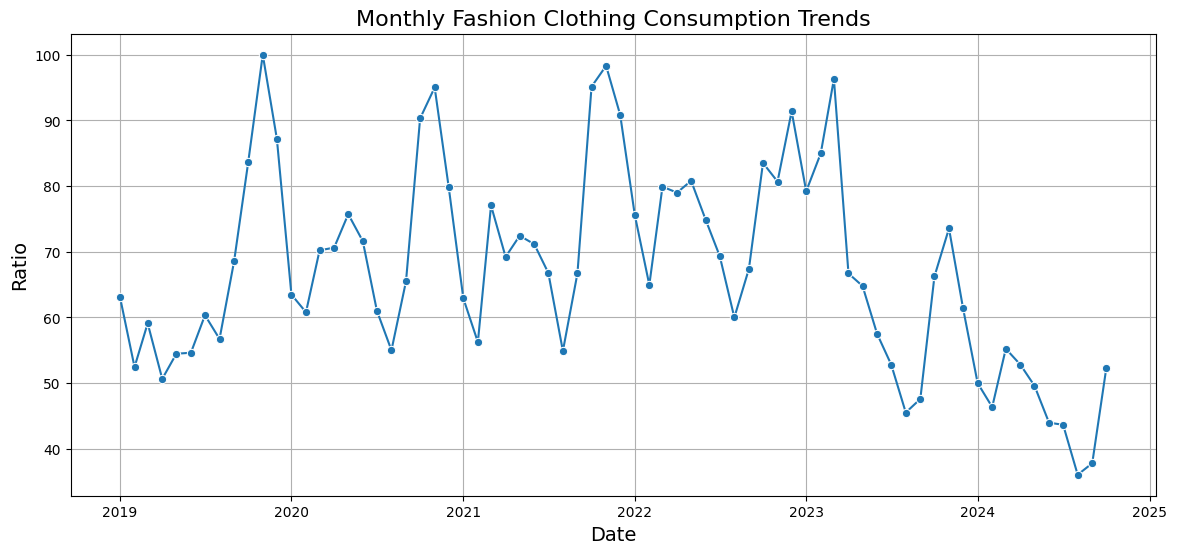

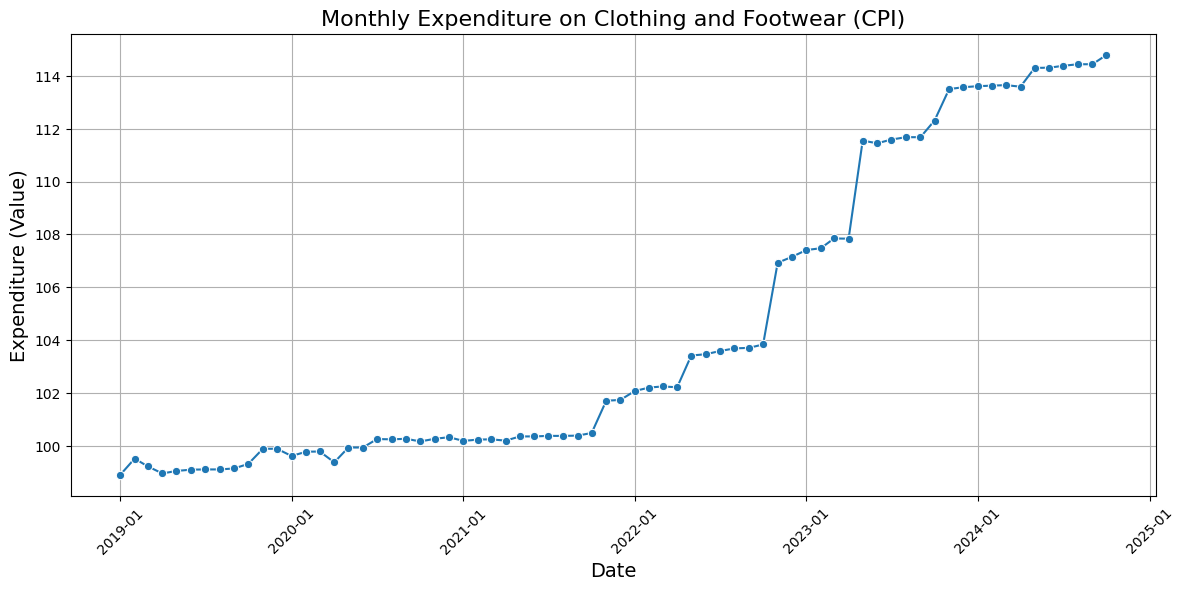

In [55]:

# Visulization
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_shopping_insite, x=df_shopping_insite.index, y='ratio', marker='o')
plt.title("Monthly Fashion Clothing Consumption Trends", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Ratio", fontsize=14)
plt.grid(True)

plt.show() # Print

# Visualization
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_fashion_purpose_filtered, x=df_fashion_purpose_filtered.index, y='price_index', marker='o')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.title("Monthly Expenditure on Clothing and Footwear (CPI)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Expenditure (Value)", fontsize=14)
plt.grid(True)

plt.show()